## Setup configuration file and parameters
Prepare or chose a config file and set the parameters to your needs

In [1]:
## Since spicelib>1.1.2 leads to problematic behaviour please confirm the version
from importlib.metadata import version
print(version('PyLTSpice'))
print(version('spicelib'))

5.3.1
1.1.2


In [2]:
import json
from src.FunctionalValidation import FunctionalValidation
from src.ControlLogicGenerator import ControlLogicGenerator
from src.Plotter import Plotter
from src.util import copy_pwm_files

############## PARAMETERS ###################
max_dev = 40    # Default 40
deviation_range = Plotter.get_dev_list(max_dev)
dev_wf = 20     # Default 20
fig_type = ['pdf', 'png', 'svg'][1]
config_file = './configs/PPU1.json'

with open(config_file, 'r') as f:
    config = json.load(f)

Verify the functionality of the algorithm and present a state history of each memristor:

In [3]:
# Check if the algorithm is valid and the resulting states are correct
Verifier = FunctionalValidation(config) 
Verifier.calc_algorithm(plot_tt=True)
print("\n--------------- Logic States verified! ---------------\n")

#####################################
Applied operations: ['F[w1]']
a | b | c | d | w1| w2| w3| w4|
--------------------
0 | 0 | 0 | 0 | 0 | 2 | 2 | 2
0 | 0 | 0 | 1 | 0 | 2 | 2 | 2
0 | 0 | 1 | 0 | 0 | 2 | 2 | 2
0 | 0 | 1 | 1 | 0 | 2 | 2 | 2
0 | 1 | 0 | 0 | 0 | 2 | 2 | 2
0 | 1 | 0 | 1 | 0 | 2 | 2 | 2
0 | 1 | 1 | 0 | 0 | 2 | 2 | 2
0 | 1 | 1 | 1 | 0 | 2 | 2 | 2
1 | 0 | 0 | 0 | 0 | 2 | 2 | 2
1 | 0 | 0 | 1 | 0 | 2 | 2 | 2
1 | 0 | 1 | 0 | 0 | 2 | 2 | 2
1 | 0 | 1 | 1 | 0 | 2 | 2 | 2
1 | 1 | 0 | 0 | 0 | 2 | 2 | 2
1 | 1 | 0 | 1 | 0 | 2 | 2 | 2
1 | 1 | 1 | 0 | 0 | 2 | 2 | 2
1 | 1 | 1 | 1 | 0 | 2 | 2 | 2
#####################################
#####################################
Applied operations: ['F[w1]', 'F[w2]']
a | b | c | d | w1| w2| w3| w4|
--------------------
0 | 0 | 0 | 0 | 0 | 0 | 2 | 2
0 | 0 | 0 | 1 | 0 | 0 | 2 | 2
0 | 0 | 1 | 0 | 0 | 0 | 2 | 2
0 | 0 | 1 | 1 | 0 | 0 | 2 | 2
0 | 1 | 0 | 0 | 0 | 0 | 2 | 2
0 | 1 | 0 | 1 | 0 | 0 | 2 | 2
0 | 1 | 1 | 0 | 0 | 0 | 2 | 2
0 | 1 | 1 | 1 | 0 | 0

## Automatically create PWM signals
Instantiate a PWMWriter class, automatically write PWM files for the chosen algorithm in the defined topology, and temporary store them in the **PWM_output** 
folder for debugging:


In [4]:
# Automatically create PWM signals and store them in "PWM_output"
CLG = ControlLogicGenerator(config)
CLG.eval_algo()
print("\n--------------- PWM Signals created! ---------------\n")

File ./outputs/PPU1/PWM_output/a.csv created!
File ./outputs/PPU1/PWM_output/b.csv created!
File ./outputs/PPU1/PWM_output/c.csv created!
File ./outputs/PPU1/PWM_output/d.csv created!
File ./outputs/PPU1/PWM_output/w1.csv created!
File ./outputs/PPU1/PWM_output/w2.csv created!
File ./outputs/PPU1/PWM_output/w3.csv created!
File ./outputs/PPU1/PWM_output/w4.csv created!
File ./outputs/PPU1/PWM_output/a_sw.csv created!
File ./outputs/PPU1/PWM_output/b_sw.csv created!
File ./outputs/PPU1/PWM_output/c_sw.csv created!
File ./outputs/PPU1/PWM_output/d_sw.csv created!
File ./outputs/PPU1/PWM_output/w1_sw.csv created!
File ./outputs/PPU1/PWM_output/w2_sw.csv created!
File ./outputs/PPU1/PWM_output/w3_sw.csv created!
File ./outputs/PPU1/PWM_output/w4_sw.csv created!
File ./outputs/PPU1/PWM_output/cin.csv created!
File ./outputs/PPU1/PWM_output/cin_sw.csv created!
PWM Files written successfully

--------------- PWM Signals created! ---------------



Overwrite the current algorithm in the chosen topology folder:

In [5]:
# Copy the files to the folder of the corresponding topology (This removes the old files !)
copy_pwm_files(config, CLG.step_size)
print(f"""\n--------- Files of {config["topology"]} topology overwritten! --------\n""")


--------- Files of Serial-Mult topology overwritten! --------



## Illustrate the deviation experiments
Instantiate a Plotter class in which the Simulator is embedded for convenience. \
The energy consumption is automatically calculated.

In [6]:
PLT = Plotter(config)

Calculating energy consumption:


100%|██████████| 16/16 [00:16<00:00,  1.02s/it]

Average Energy consumption: 2.9183949e-09
Energy over Combination: [2.3690987999999996e-09, 2.6253989999999997e-09, 2.6433702e-09, 3.0594132e-09, 2.6213706e-09, 2.8809702e-09, 2.8989467999999996e-09, 3.2972345999999996e-09, 2.6393796e-09, 2.8989414e-09, 2.913732e-09, 3.3152273999999995e-09, 2.831814e-09, 3.097224e-09, 3.1152006e-09, 3.486996e-09]


The three main plot options are:
1) plot_deviation_scatter()
2) plot_deviation_range()
3) plot_waveforms_with_deviation()

If the simulations have been run already (The files of the last simulation is stored in the folder **outputs**), the parameter **recompute** can be set **False**.

Calculating resistance deviation 0:


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


Calculating resistance deviation 5:


100%|██████████| 8/8 [01:15<00:00,  9.43s/it]


Calculating resistance deviation 10:


100%|██████████| 8/8 [01:15<00:00,  9.43s/it]


Calculating resistance deviation 20:


100%|██████████| 8/8 [01:15<00:00,  9.42s/it]


Calculating resistance deviation 30:


100%|██████████| 8/8 [01:15<00:00,  9.43s/it]


Calculating resistance deviation 40:


100%|██████████| 8/8 [01:15<00:00,  9.43s/it]



--------- Deviation Experiments completed --------



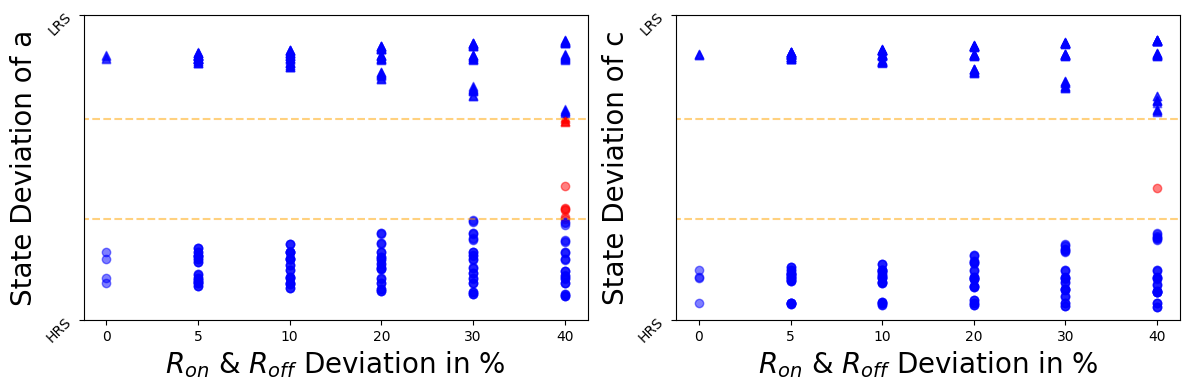

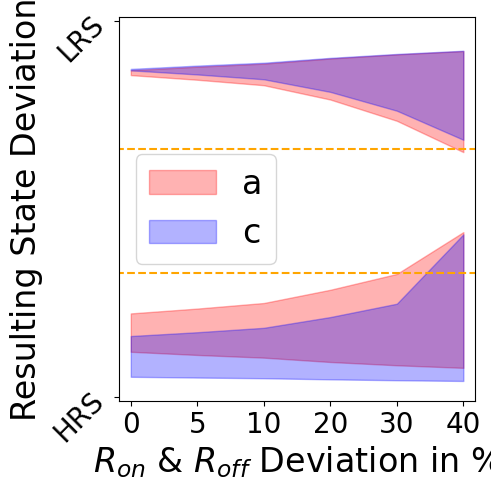

In [8]:
PLT.plot_deviation_scatter(dev_range=deviation_range, recompute=True, fig_type=fig_type)
PLT.plot_deviation_range(dev_range=deviation_range, recompute=False, fig_type=fig_type, save_dev_range=True)
print(f"\n--------- Deviation Experiments completed --------\n")

Create waveform images with deviation ranges for all input combinations with deviation **dev_wf**:


--------- Waveforms with deviation 20 saved --------



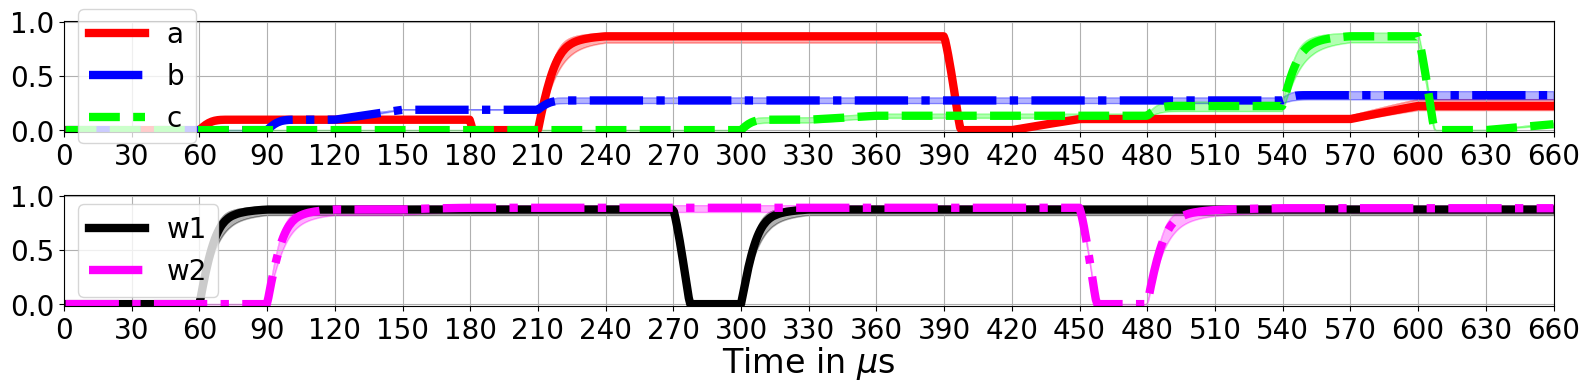

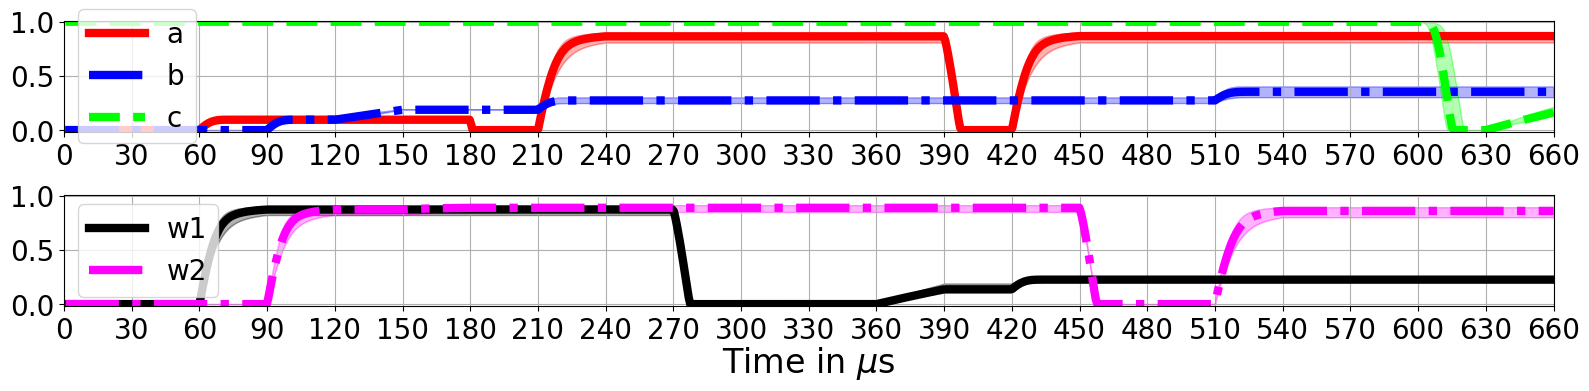

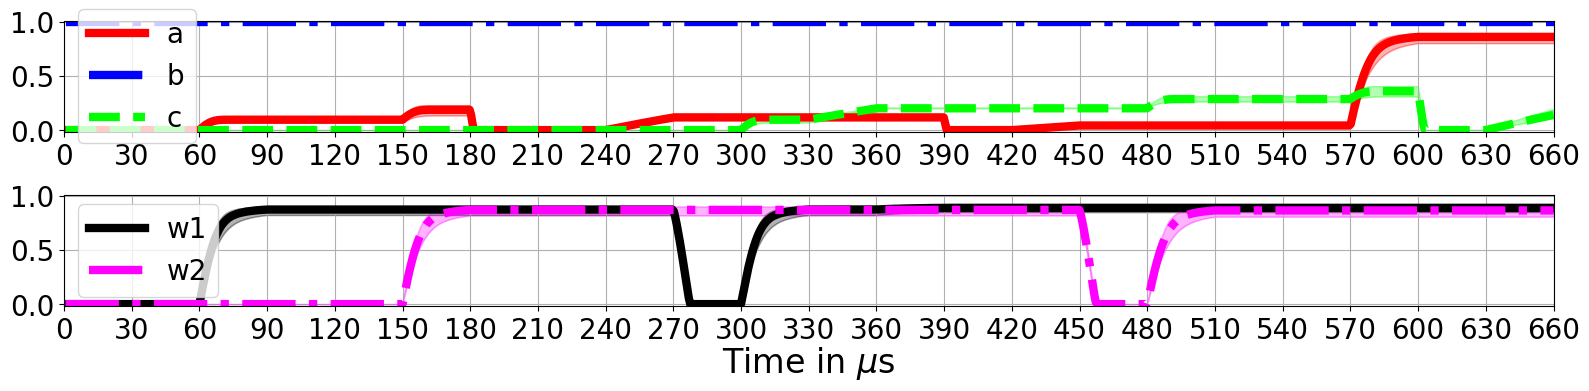

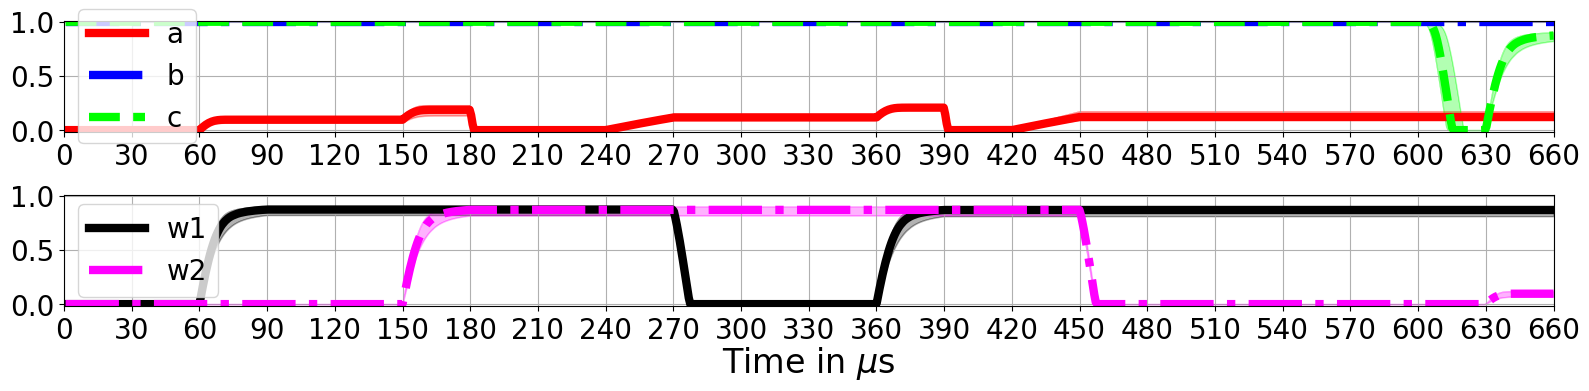

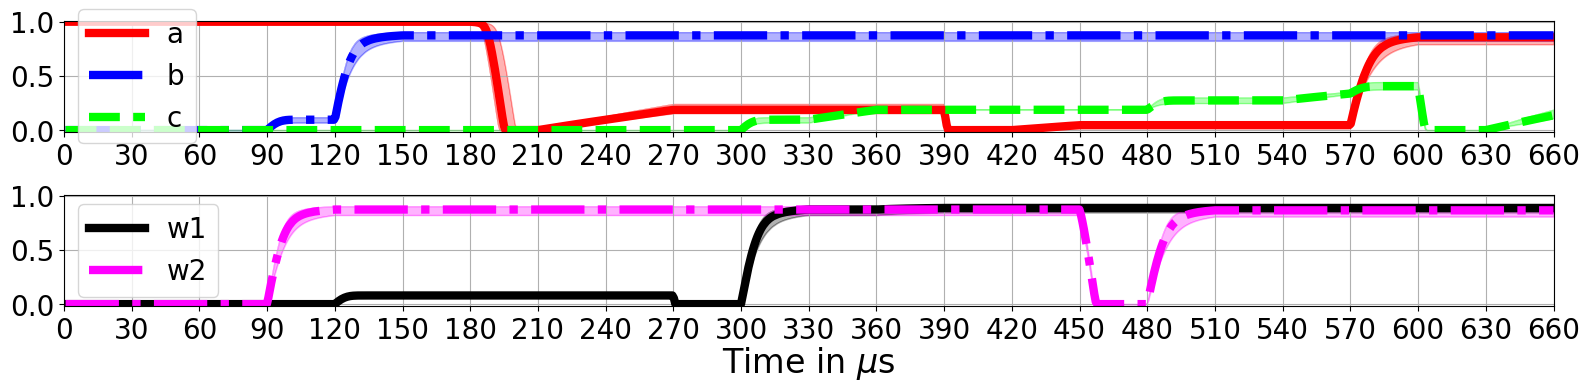

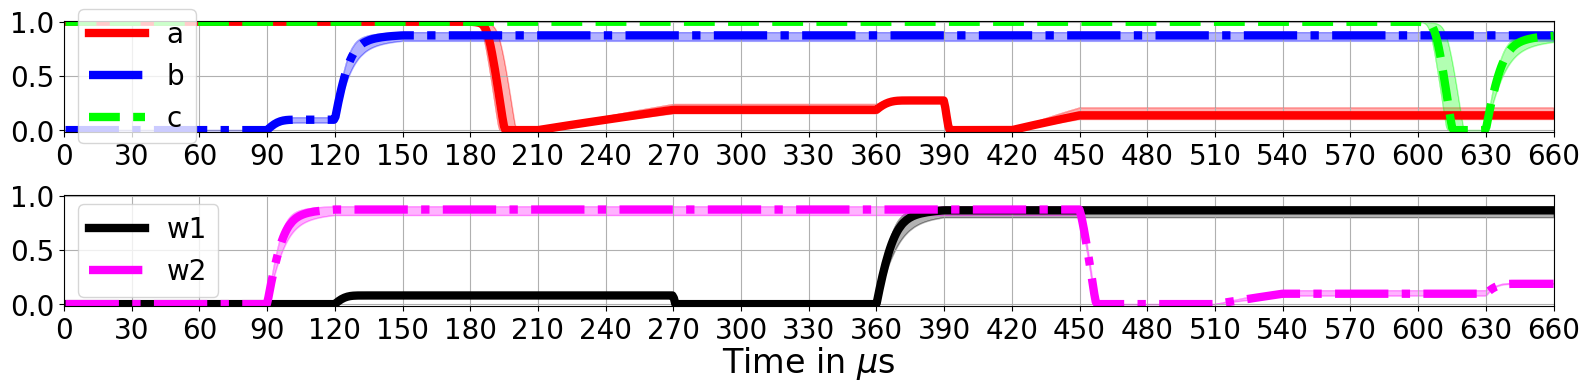

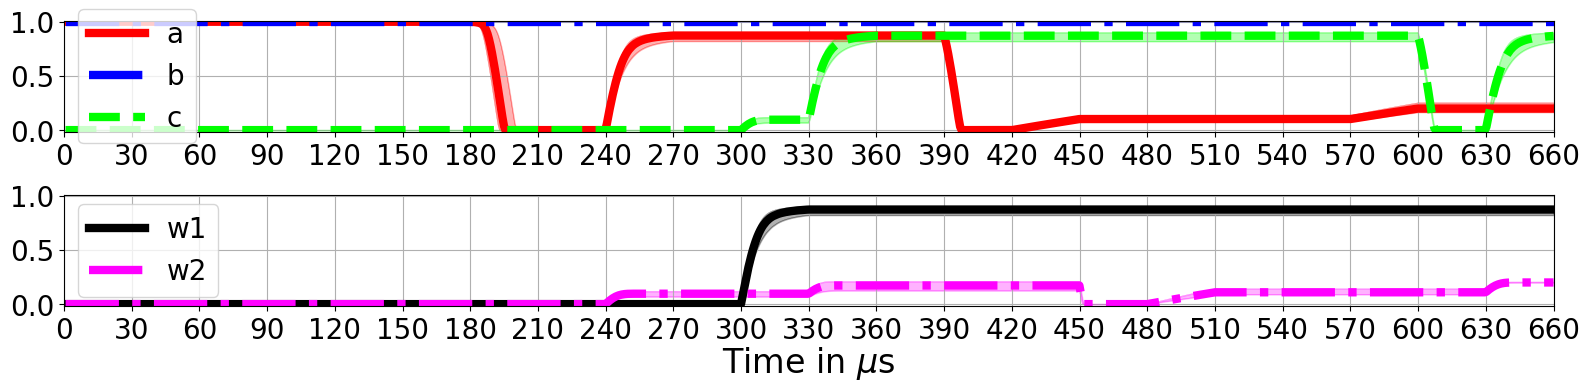

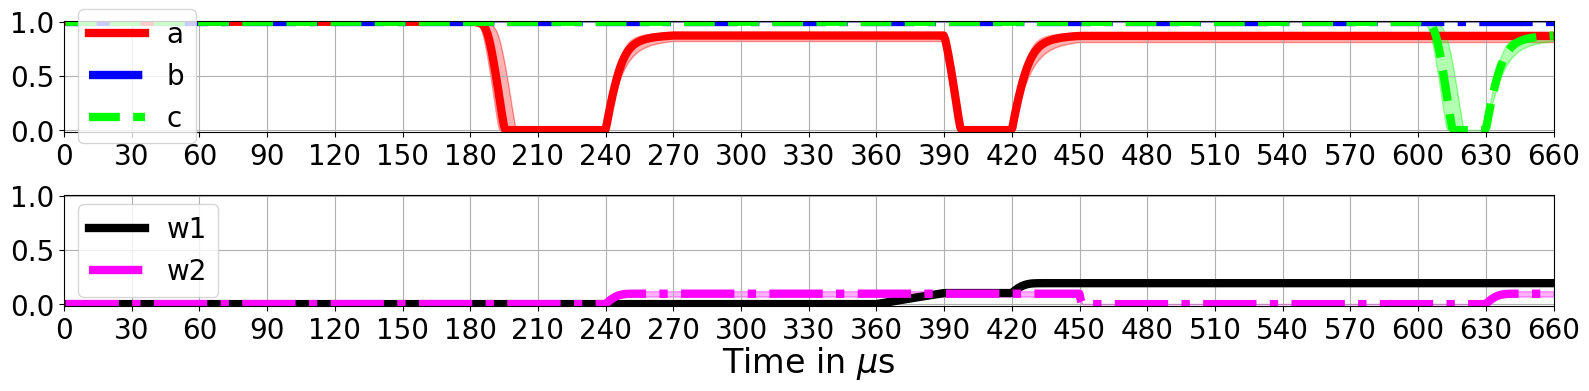

In [9]:
for comb in range(2**len(config["inputs"])):
    comb_str = bin(comb)[2:].zfill(len(config["inputs"]))
    PLT.plot_waveforms_with_deviation(comb_str, dev=dev_wf, recompute=False, fig_type=fig_type)
print(f"\n--------- Waveforms with deviation {dev_wf} saved --------\n")

Illustrate a single input combination with unique parameters:

Calculating resistance deviation 20:


100%|██████████| 8/8 [01:16<00:00,  9.54s/it]


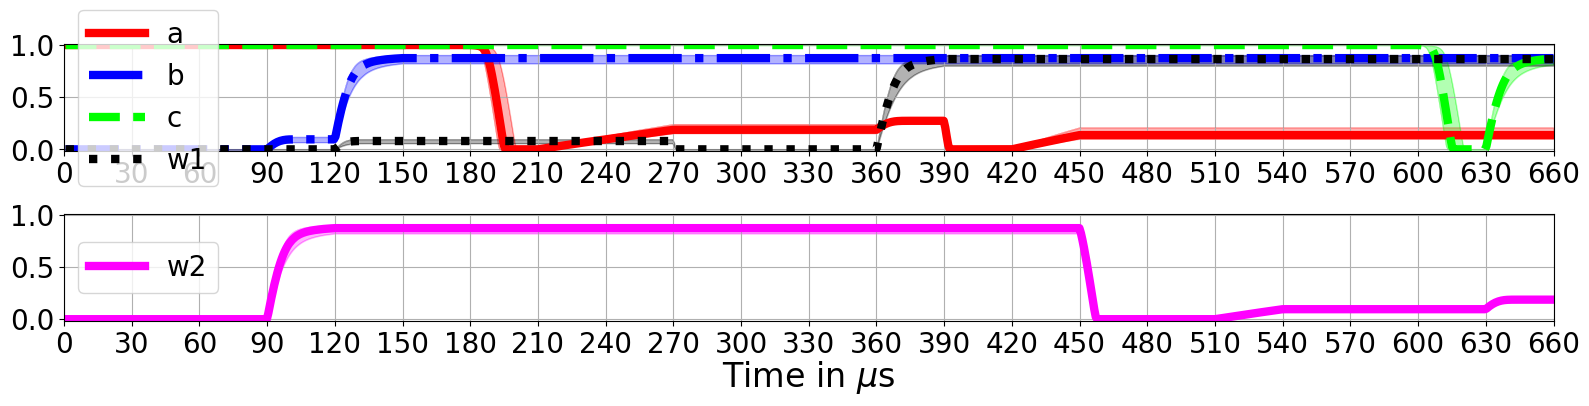

In [10]:
comb = '101'
dev = 20
fig_type_s = 'png'
recompute_s = True
PLT.plot_waveforms_with_deviation(comb, dev=dev, recompute=recompute_s, fig_type=fig_type_s, plots_per_subfigure=4)

## Store the results
Save created images and state deviation files in **OUTPUT_FILES**


In [11]:
PLT.save_algorithm_files(f"""{config["algorithm"].split(".")[0]}""")

Files for exact_rohani were saved successfully!
